In [1]:
%matplotlib inline

In [2]:
from ssf_code import *

* Back to [Introduction](./01_Signals_Sound_and_Filters_Intro.ipynb)

### ACT I, Chapter II
# 2.1 ACOUSTIC SOUND
#### A brief and semi-simplified view
As one can deduce from the word "acoustic", we're in the *continuous-time-valued analog domain*. In the previous chapter we introduced the _periodic_ signals, which are signals that repeat themselves after some period of time. For example, if you strike a bell, it vibrates and generates sound.  

### WHAT IS SOUND?

The way oversimplified answer: **Sound is variation in air pressure.  A sound signal represents variations in air pressure over time.** But we have to delve a bit deeper. Sound is normally understood to mean elastic molecular oscillations in air or other media such as water, iron, or concrete. These oscillations result in pressure variations that are of such a magnitude that they can be sensed by human hearing.

However, sound can also be converted to, for example, variations in the electrical current in a conductor, or magnetic variations on an audio tape, or sequence of numeric values. We call these **intermediate formats**, because we later convert them into acoustic sound.

### SPEED OF SOUND
Sound propagates by an oscillating solid body setting the particles next to it in motion, and those next to them, and so on. Sound thus spreads with a certain propagation velocity. This is called the **speed of sound**, which varies depending on the medium.

The speed of sound **$(c)$** in a medium is normally specified in meters per second **$[m/s]$** or feet per second **$[ft/s]$.**  In the air the speed of sound is dependent on the temperature:
- In air, at **$0°C$** the speed of sound is **$331.4 m/s$**
- In air, at **$20°C$** the speed of sound is **$343.54 m/s$**
- As a rule **$340m/s$** is used as approximation for the speed of sound for general purposes.

### FREQUENCY
Frequency **$f$** is a measure of the number of oscillations or cycles per second, and is specified in **hertz** (abbreviated as **Hz**). Strictly speaking, the number of cycles is a dimensionless number, so a Hertz is really a “per second”. $$f = \frac{1}{T}$$
Where $f = frequency [Hz]$ and $T = period [s]$ and is read as follows: The frequency of a signal is the number of cycles per second, which is the inverse of the period.

### WAVELENGTH
For sake of simplicity and shortness of this document, we accept that $$ \lambda = \frac{c}{f}$$ and we mention nothing about **"wave theory boundary area"**, acoustics of rooms, directional patterns of loudspeakers, and frequency response of microphones. ;)

### The next few aspects about acoustic sound that we will not look closely but is good to know they exist:
- **Sound pressure** - measured in Pascals; $1Pa = 1 N/m^2$; Weakest audible sound at 1kHz has sound pressure at approx. $20\mu Pa$, and the ear's threshold of pain lies at around $20Pa$. Note that's a factor of one million.
- Conversion Relationships - pascal is a unit of SI; and some (older)audio equipment uses the $bar$ unit.
- **Sound power** - sound is a form of energy, hence the concept of power. "In a traveling plane wave with a sound pressure of $20\mu Pa$, the power that passes through an area of $1 m^2$ placed perpendicular to the direction of travel is $1pW(one pico-watt)$ 
- **Sound intensity** - an expression of power per unit area. Sound intensity has a directional component.
- **Sound fields** - particularly deep can of worms, but there are 3 types of fields depending of the source:
    - Spherical Sound Field - point source; intensity drops according to the **inverse square law** $I = \frac{1}{d^2}$; pressure falls - $P = \frac{1}{d}$
    - Cylindrical Sound Field - an (infinite) line source; intensity falls according to $I = \frac{1}{d}$ and pressure according to $P=\frac{1}{\sqrt{d}}$
    - Plane Sound Field - the sound doesn't attenuate as the intensity is kept constant in the direction of propagation. Doesn't really exist IRL; maybe observing(listening to) a rocket launch at a great distance is kinda-sorta of an example.

# 2.2 DIGITAL REPRESENTATION

In the previous chapter we got introduced to the **digitization** of an analog signal. Now we'll go for a deeper understanding of the *two* steps of process - namely (**Antialiasing**,) **Sampling** and **Quantization**.

## 2.2.1 Sampling
In signal processing, the therm **sampling** refers to the process of reducing a continuous-time(CT) signal to a discrete-time(DT) signal, which is defined on a discrete subset of the time axis. The most common procedure to transform a CT-signal $f:\mathbb{R}\rightarrow\mathbb{R}$ into a DT-signal $x:\mathbb{Z}\rightarrow\mathbb{R}$ is known as **equidistant sampling**.

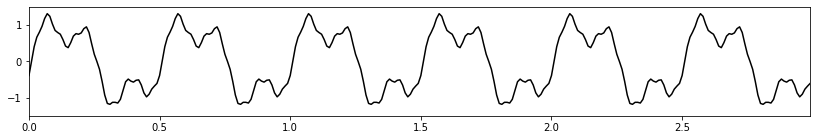

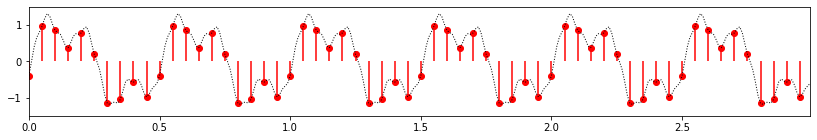

In [3]:
fs_fine = 100
fs = 20
f, t_fine, x, t_sample, f_sinc = sampling_reconstruction(Fs=fs, Fs_fine=fs_fine)

plt.figure(figsize=(14, 2))
plt.plot(t_fine, f, 'k')
plt.ylim([-1.5, 1.5])
plt.xlim([t_fine[0], t_fine[-1]])

plt.figure(figsize=(14, 2))
plt.stem(t_sample, x, linefmt='r', markerfmt='ro', basefmt='None', use_line_collection=True)
plt.plot(t_fine, f, 'k', linewidth=1, linestyle='dotted')
plt.ylim([-1.5, 1.5])
plt.xlim([t_fine[0], t_fine[-1]]);

Sampling may cause an effect known as aliasing where certain frequency components of the signal become indistinguishable. This effect is illustrated by the following plots.

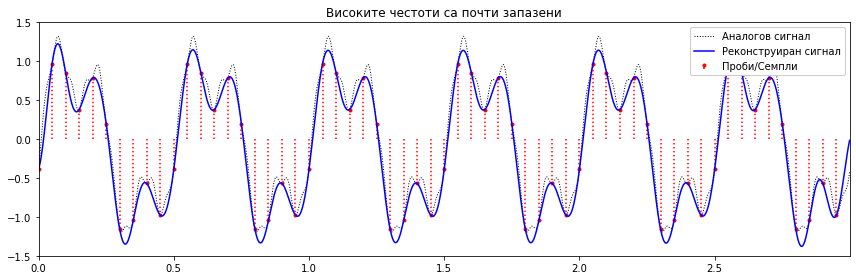

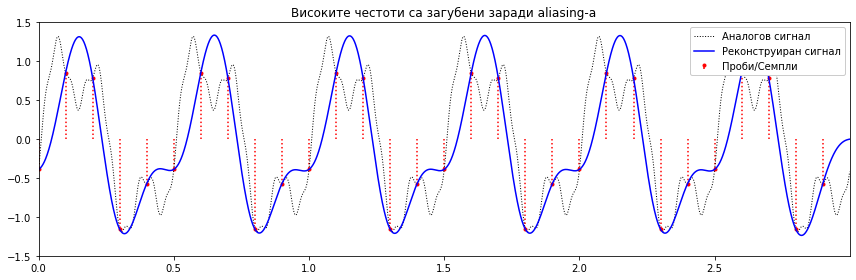

In [12]:
Fs_fine = 1000
Fs = 20
f, t_fine, x, t_sample, f_sinc = sampling_reconstruction(Fs=Fs, Fs_fine= Fs_fine)

plt.figure(figsize=(12, 4))
plt.plot(t_fine, f, 'k', linewidth=1, linestyle='dotted', label='Аналогов сигнал')
plt.stem(t_sample, x, linefmt='r:', markerfmt='r.', basefmt='None', label='Проби/Семпли', use_line_collection=True)
plt.plot(t_fine, f_sinc, 'b', label='Реконструиран сигнал')
decorate(ylim=[-1.5, 1.5], xlim=[t_fine[0], t_fine[-1]], title="Високите честоти са почти запазени")
plt.legend(loc='upper right', framealpha=1)

# Lowering the sampling rate
Fs_fine = 1000
Fs = 10
f, t_fine, x, t_sample, f_sinc = sampling_reconstruction(Fs=Fs, Fs_fine= Fs_fine)

plt.figure(figsize=(12, 4))
plt.plot(t_fine, f, 'k', linewidth=1, linestyle='dotted', label='Аналогов сигнал')
plt.stem(t_sample, x, linefmt='r:', markerfmt='r.', basefmt='None', label='Проби/Семпли', use_line_collection=True)
plt.plot(t_fine, f_sinc, 'b', label='Реконструиран сигнал')
decorate(ylim=[-1.5, 1.5], xlim=[t_fine[0], t_fine[-1]], title="Високите честоти са загубени заради aliasing-а")
plt.legend(loc='upper right', framealpha=1);

### 2.2.2 Antialiasing
Aliasing is the error that we get when we take something that is actually continuous to the discrete domain.
In general, sampling is a **lossy** operation in the sense that information is lost in this process and that the original analog signal cannot be recovered from its sampled version. This is the assertion of the famous *sampling theorem*. The sampling theorem, which is often associated with the names Harry Nyquist and Claude Shannon, states that a continuous-time (CT) signal that is bandlimited can be reconstructed perfectly under certain conditions.

Before the analog signal can be converted to a digital signal, it is necessary to determine a well-defined upper cut-off frequency $f_u$, and a low-pass filter is used for this. This filtering is called **antialiasing**. The necessity of the filtering is due to the sampling process itself. The analog signal must not contain frequencies that are higher than half of the sampling frequency(also called the **Nyquist frequency**, or wrap-around frequency).
Using a high sampling rate, the analog signal can be reconstructed with high accuracy. However, when decreasing the sampling rate, the higher-frequency components are not captured well and only a coarse approximation of the original signal remains.
If the sampling frequency is lower than twice the highest input frequency, then the reconstructed signal will contain frequency components that were not present in the original. The filter ensures that the signal doesn't contain any aliasing frequencies after reconstruction.
In other words, the CT-signal $f$ can be (almost)perfectly reconstructed from the DT-signal $x$ obtained by equidistant sampling if the bandlimit is no greater than half the sampling rate.

Lets look at a small experiment that shows aliasing in action. We will generate a two wave signals. One with fundamental frequency of 4500Hz and one with 5500Hz. We will sample the signals with 10kHz sampling frequency and we'll look at the resulting plots. See if you can spot the differences. (hint: you can't)

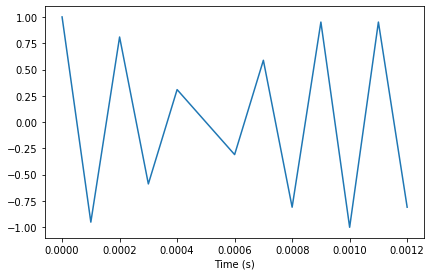

In [5]:
cosine_signal_4500 = CosSignal(4500)
duration = cosine_signal_4500.period*6
segment = cosine_signal_4500.make_wave(duration, framerate=10000)
decorate(xlabel='Time (s)')
segment.plot()

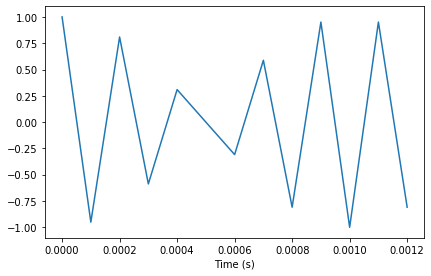

In [6]:
cosine_signal_5500 = CosSignal(5500)
segment = cosine_signal_5500.make_wave(duration, framerate=10000)
decorate(xlabel='Time (s)')
segment.plot()

![Alt text](./_images/aliasing_cosine_signals.png) Cosine signals at 4500 and 5500 Hz, sampled at 10,000 frames per second. The signals are different, but the samples are identical.

### 2.2.1 Sampling(cont.)
After the low-pass filtering, sampling is performed. Sampling consists of measuring the instantaneous value of the signal. The frequency at which this measurement is taken is called **sampling frequency $(f_{S})$, sample rate**, or (infuriatingly for a sound engineer who's verse in cinematography and is going for a Python degree) **framerate** in Python.

#### 2.2.1.1 Oversampling
This is sampling done at a frequency that is order of magnitude higher than the requisite minimum. Oversampling is utilized because it makes it easier to implement antialiasing filters. In addition, oversampling is a necessity when the signal must be resolved into many bits, again because it is not possible to implement filters that are as sharp as would be needed to, for example, be able to make a difference at a resolution of 24 bits.

### 2.2.3 Quantization
Now comes the part of the "two-step" process that determines the digital "number". Here, the measurement taken at the *sample period* is replaced from the continuous range of possible amplitudes (again encoded by $\mathbb{R}$) to a discrete range of possible values (encoded by a discrete set $\Gamma\in\mathbb{R}$). This process is called **quantization**. During quantization, the size of the individual sample is converted to a number. This transformation, or conversion, is almost never completely ideal, however.
The quantizer assigns to each amplitude value $a\in\mathbb{R}$ a value $𝑄(a)\in\Gamma$. Many of the quantizers used simply round off or truncate the analog value to some units of precision. The scale that is being used for purposes of comparison has a finite resolution that is determined by the number of bits. With quantization, it is the number of bits that determine the precision of the value read.

Like sampling, quantization is generally a lossy operation, because different analog values may be mapped to the same digital value. The difference between the actual analog value and the quantized value is called the quantization error.


#### For the sake of simplicity, these will be honorably mentioned only:
- **A-D Conversion**
- **D-A Conversion**
- **Bit reduction**
- **Lossless packing**
- **Nonlinear quantization**
- **Perceptual coding**
- **Interference**

# 2.3 SIGNAL TYPES

Now we know that sound is pressure that varies over time. And that represented in electrical form, it is voltage or current that varies over time. And that represented in digital form it is a sequence of quantized numbers. 
Now lets get back to periodic signals(which are signals that repeat themselves after some period of time).

This means that every sound - regardless of how many frequencies it might contain - can be visually represented in a graph by a function of signal's variation in time or **waveform**. The shape of a periodic signal is called the **waveform**. Some of the more typical waveforms and their frequency content are described in the following.

### 2.3.1 PURE TONES
Pure tones are characterized by a sinusoidal waveform. These are periodic signals that contain one and only one frequency. In practice, pure tones almost always occur as test signals only.
The following signal resembles(de facto it is) a sinusoid, which means it has the same shape as the trigonometric $\sin$ function.

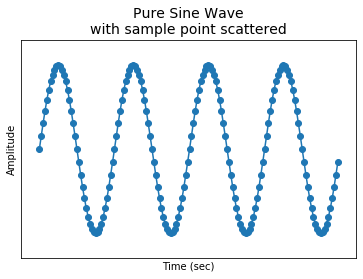

In [7]:
time = np.arange(0, 8*np.pi, pi/20)
sine_wave = np.sin(time)
plt.plot(time, sine_wave)
plt.grid(True)
plt.scatter(time, sine_wave)
plt.yticks(())
plt.xticks(())
plt.ylim([-1.3, 1.3])
plt.title(f'Pure Sine Wave\nwith sample point scattered', fontsize=14)
# plt.text(2, -1.3, 'time axis ->', ha='center', va='center', size=14, color='red')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

### 2.3.2 COMPLEX TONES
Complex tones are periodic signals that are based on a fundamental frequency with associated harmonic overtones. These signals are, among other things, characteristic of musical instruments and the human voice. Here is asserted The Superposition Principle - "If you add a bunch of waves together, it forms one wave."

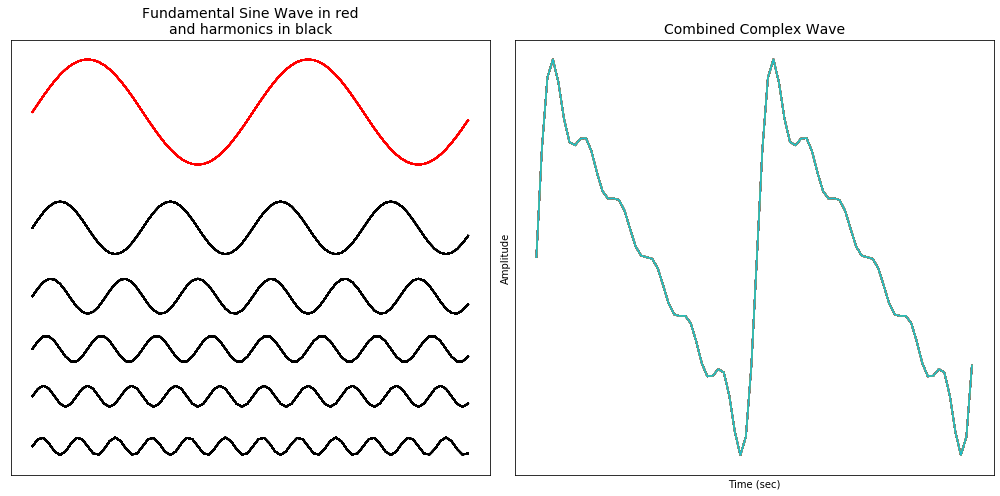

In [8]:
time = np.arange(0, 4*np.pi, pi/20)
f0 = np.array(((np.sin(time * 1))*(1/1)))+1
f1 = ((np.sin(time * 2))*(1/2))-1.2 # the minus at the end is used as an offset for the plot
f2 = ((np.sin(time * 3))*(1/3))-2.5
f3 = ((np.sin(time * 4))*(1/4))-3.5
f4 = ((np.sin(time * 5))*(1/5))-4.4
f5 = ((np.sin(time * 6))*(1/6))-5.35
combined = f0 + f1 + f2 + f3 + f4 + f5

fig1 = plt.figure(figsize=(21, 7))
ax1 = fig1.add_subplot(1, 3, 1, polar=False)
plt.title(f'Fundamental Sine Wave in red\nand harmonics in black', fontsize=14)
ax1.grid(False)
plt.yticks(())
plt.xticks(())
ax2 = fig1.add_subplot(1, 3, 2, polar=False)
ax2.grid()
plt.title(f'Combined Complex Wave', fontsize=14)

plt.yticks(())
plt.xticks(())
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
for i in range(len(time)):
    ax1.plot(time, f0, color="red")
    ax1.plot(time, f1, color="black")
    ax1.plot(time, f2, color="black")
    ax1.plot(time, f3, color="black")
    ax1.plot(time, f4, color="black")
    ax1.plot(time, f5, color="black")
    ax2.plot(time, combined)
plt.tight_layout()

Six pure tones are shown in the graph on the left, corresponding to a fundamental tone, the associated second harmonic(with amplitude $1/2 \cdot$ the fundamental tone), followed by the third, fourth, fifth and sixth corresponding harmonic overtones. 

On the graph on the right all six pure tones are combined(summed). The waveform approximates a saw tooth waveform. Note that all the curves start at 0°. If the phase relationship(the phase angle) were different, then the resultant waveform would also have a different appearance.

I am consciously omitting what can be a chapter on its own and field of study in wireless communication signals - the __Phase__. And the reasoning behind this blunt omission will be revealed in Act III.  

### 2.3.3 SPECIAL WAVEFORMS
Among the periodic waveforms, there are typical waveforms such as sinusoid, saw tooth, triangular, square, and pulse train(or pulse string). All of them have more or less characteristic frequency content.
   - The **sawtooth wave** is characterized by the fact that it contains the fundamental frequency and all harmonics in a specific proportion - the second harmonic has half the amplitude of the fundamental, the third harmonics has a third the amplitude of the fundamental, etc. Another way to think about the sawtooth wave is a signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats.
   - The **square wave** is characterized by the fact that it contains the fundamental frequency and all the odd numbered harmonics in the same declining proportion as the saw tooth wave. The square wave is known from, among other places, electro-acoustic equipment that is overloaded and thus "clips" the peaks off the signal. This is called **harmonic distortion**.

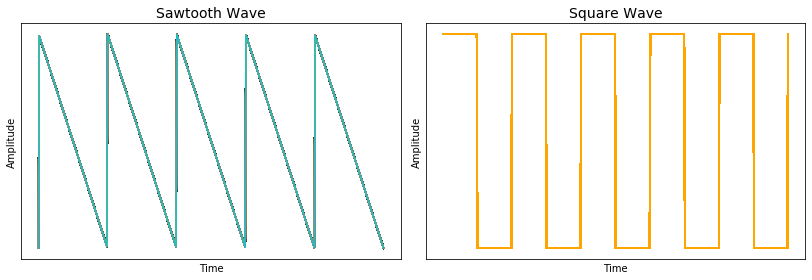

In [9]:
time = np.linspace(0, 1, 500)

fig = plt.figure(figsize=(17, 4))
ax1 = fig.add_subplot(1, 3, 1)
plt.xticks(())
plt.yticks(())
plt.title(f'Sawtooth Wave', fontsize=14)
ax2 = fig.add_subplot(1, 3, 2)
plt.xticks(())
plt.yticks(())
plt.title(f'Square Wave', fontsize=14)
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')

for i in range(len(time)):
    ax1.plot(time, signal.sawtooth(2 * -pi * 5 * time))
    ax2.plot(time, signal.square(2 * pi * 5 * time), color = "orange")
    
plt.tight_layout()

# 2.4 NOISE SIGNALS
Those signals for which no sensation of tone occurs are called **noise**. The term **noise** also refers to unwanted signal modifications, but is often extended to include unwanted signals conflicting with desired signals (crosstalk). These are characterized by, among other things, all frequencies in a given range of frequencies being represented. Some well-defined electrical noise signals belong to this group, and are used as test signals. The term **white noise** is fairly common. People unfamiliar with its technical meaning will describe some sort of background noise, like a fan, as white noise. Less common are terms like pink noise, red noise, etc. The colors of noise are defined various ways, but they are all based on an analogy between the power spectrum of the noisy signal and the spectrum of visible light. Next few lines give the motivations, intuitive definitions and characteristics of the most common types of noise.

- **White noise** is a signal that contains constant energy per Hz bandwidth. Or said differently - it has a flat power spectrum, analogous to white light containing all other colors (frequencies) of light.
- **Pink noise** is a signal that contains constant energy per octave(or $\frac{1}{3}$ octave). The amplitude follows function $\frac{1}{f}$, which corresponds to it diminishing by 3 dB per octave or 10 dB per decade. Or said differently - pink noise has a power spectrum inversely proportional to its frequency f (or in some definitions, inversely proportional to fα for some exponent α near 1). Visible light with such a spectrum appears pink because there is more power toward the low (red) end of the spectrum, but a substantial amount of power at higher frequencies since the power drops off slowly.
- **Brown noise** - is a signal where the amplitude diminishes by $\frac{1}{f^2}$, corresponding to 6 dB per octave or 20 dB per decade. Now comes a head spinner - the spectrum of **red noise** is more heavily weighted toward low frequencies, analogous to light with more red and less white. Confusingly, **red noise is also called Brown noise**, not after the color brown but after the person Robert Brown, discoverer of Brownian motion.
- **Blue noise** - is the opposite of red, with power increasing in proportion to frequency, analogous to light with more power toward the high (blue) frequencies.
- **Grey noise** is a sort of psychologically white noise. Instead of all frequencies having equal power, all frequencies have equal perceived power, with lower actual power in the middle and higher actual power on the high and low end.

Generating noise signals from scratch in any programing language can be a particularly hard-to-do thesis on its own due to the nature of generating truly random bits and digits in the deterministic domain of the computer science and the complexity of mathematics involved in the selection of spectrum per type of noise. If interested, look into Voss-McCartney algorithm.

To that end in order to illustrate the general shape of some noise types, the following plots will be made using wave files that I have generated in a DAW software, and so the examples will not be interactive(i.e. refreshing the cell won't give a different graph).

Note that while the waveform gives us a general idea about the chaotic nature of the signal,  their respective spectra are far more interesting, but are outside of the scope of this notebooks.

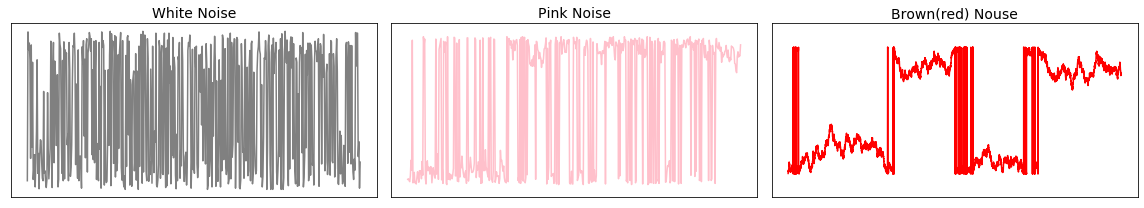

In [10]:
with closing(open_wave("./_audio/white_noise_sr8k_8bit.wav", "r")) as white_file:
    white_data = white_file.readframes(8000)
    white_str = np.asanyarray(np.frombuffer(white_data, dtype=np.int8))
    time = np.arange(len(white_str))/8000

with closing(open_wave("./_audio/pink_noise_sr8k_8bit.wav", "r")) as pink_file:
    pink_data = pink_file.readframes(8000)
    pink_str = np.asanyarray(np.frombuffer(pink_data, dtype=np.int8)) 
    
with closing(open_wave("./_audio/brown_noise_sr8k_8bit.wav", "r")) as brown_file:
    brown_data = brown_file.readframes(8000)
    brown_str = np.asanyarray(np.frombuffer(brown_data, dtype=np.int8))

fig = plt.figure(figsize=(16, 3))
n1 = fig.add_subplot(1, 3, 1)
plt.xticks(())
plt.yticks(())
plt.title(f'White Noise', fontsize=14)
n2 = fig.add_subplot(1, 3, 2)
plt.xticks(())
plt.yticks(())
plt.title(f'Pink Noise', fontsize=14)
plt.ylim([-150, 150])
n3 = fig.add_subplot(1, 3, 3)
plt.xticks(())
plt.yticks(())
plt.title(f'Brown(red) Nouse', fontsize=14)
plt.ylim([-175, 175])

i = 1
j = 512

n1.plot(time[i:j], white_str[i:j], color='gray', label="White noise")
n2.plot(time[i:j], pink_str[i:j], color='pink', label="Pink noise")
n3.plot(time, brown_str, color='red', label="Brown noise")
    
plt.tight_layout()

Off we go to [the next part :)](./04_Signals_Sound_and_Filters_A1C3.ipynb)